# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


In [2]:
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    #print(lat_lng)
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
Cloud=[]
Country=[]
Date=[] 
Humidity =[]    
Lat=[]
Lng=[]   
Max_Temp=[]
Wind_Speed=[]
citiesNotFound=[]

   

In [5]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
print("Beginning Data Retrieval\n-----------------------------")
def chunks(List, Elements_in_chunk):
    # For item i in a range that is a length of list,
    for i in range(0, len(List), Elements_in_chunk):
        # Create an index range for list of n(Elements_in_chunk) items:
        yield List[i:i+Elements_in_chunk]
Sets = list(chunks(cities, 50))
for set in Sets:
    for x in range(0,len(set)):  
        try:
            response = requests.get(base_url +"appid=" + api_key+ "&q=" + set[x] +"&units=imperial").json()
            print("Processing Record {} of Set {} | {}".format(x if Sets.index(set) > 0 else x+1, Sets.index(set)+1, set[x]))
            Cloud.append(response["clouds"]["all"])
            Country.append(response["sys"]["country"])
            Date.append(response["dt"])
            Humidity.append(response["main"]["humidity"])
            Lat.append(response["coord"]["lat"])
            Lng.append(response["coord"]["lon"])
            Max_Temp.append(response["main"]["temp_max"])
            Wind_Speed.append(response["wind"]["speed"])
        except:
            print("City not found. Skipping...")
            cities.remove(set[x])
            citiesNotFound.append(set[x])         
        
        
print("-----------------------------\nData Retrieval Complete\n-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | longlac
City not found. Skipping...
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | torbay
Processing Record 6 of Set 1 | umm lajj
Processing Record 7 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | faya
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | leningradskiy
Processing Record 16 of Set 1 | panaba
Processing Record 17 of Set 1 | ko samui
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | ust-kalmanka
Processing Record 20 of Set 1 | norman wells
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | cabo 

Processing Record 38 of Set 4 | menongue
Processing Record 39 of Set 4 | escanaba
Processing Record 40 of Set 4 | shingu
Processing Record 41 of Set 4 | jalu
Processing Record 42 of Set 4 | nguiu
City not found. Skipping...
Processing Record 43 of Set 4 | ambilobe
Processing Record 44 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 45 of Set 4 | rocha
Processing Record 46 of Set 4 | ciudad bolivar
Processing Record 47 of Set 4 | bardiyah
City not found. Skipping...
Processing Record 48 of Set 4 | nikolskoye
Processing Record 49 of Set 4 | caucaia
Processing Record 0 of Set 5 | tari
Processing Record 1 of Set 5 | pangnirtung
Processing Record 2 of Set 5 | ocos
Processing Record 3 of Set 5 | masvingo
Processing Record 4 of Set 5 | ileza
Processing Record 5 of Set 5 | asau
City not found. Skipping...
Processing Record 6 of Set 5 | centralina
Processing Record 7 of Set 5 | muromtsevo
Processing Record 8 of Set 5 | eganville
Processing Record 9 of Set 5 | liverpool
Proc

Processing Record 26 of Set 8 | talcahuano
Processing Record 27 of Set 8 | monrovia
Processing Record 28 of Set 8 | chemax
Processing Record 29 of Set 8 | bambous virieux
Processing Record 30 of Set 8 | kasempa
Processing Record 31 of Set 8 | sitka
Processing Record 32 of Set 8 | castelo branco
Processing Record 33 of Set 8 | newcastle
Processing Record 34 of Set 8 | hami
Processing Record 35 of Set 8 | paragominas
Processing Record 36 of Set 8 | ondorhaan
City not found. Skipping...
Processing Record 37 of Set 8 | saint combs
City not found. Skipping...
Processing Record 38 of Set 8 | banihal
Processing Record 39 of Set 8 | bousso
City not found. Skipping...
Processing Record 40 of Set 8 | sorvag
City not found. Skipping...
Processing Record 41 of Set 8 | verkh-usugli
Processing Record 42 of Set 8 | burla
Processing Record 43 of Set 8 | fasa
Processing Record 44 of Set 8 | pilar
Processing Record 45 of Set 8 | svetlogorsk
Processing Record 46 of Set 8 | quelimane
Processing Record 47 

Processing Record 13 of Set 12 | bourail
Processing Record 14 of Set 12 | cockburn town
Processing Record 15 of Set 12 | hirara
Processing Record 16 of Set 12 | adre
Processing Record 17 of Set 12 | camacha
Processing Record 18 of Set 12 | santa rosa
Processing Record 19 of Set 12 | sfantu gheorghe
Processing Record 20 of Set 12 | karratha
Processing Record 21 of Set 12 | pimentel
Processing Record 22 of Set 12 | alcaniz
Processing Record 23 of Set 12 | general roca
Processing Record 24 of Set 12 | sakaiminato
Processing Record 25 of Set 12 | bubaque
Processing Record 26 of Set 12 | salamanca
Processing Record 27 of Set 12 | vulcan
Processing Record 28 of Set 12 | holly hill
Processing Record 29 of Set 12 | phangnga
Processing Record 30 of Set 12 | bergen
City not found. Skipping...
Processing Record 31 of Set 12 | buraydah
Processing Record 32 of Set 12 | abha
Processing Record 33 of Set 12 | san ignacio
Processing Record 34 of Set 12 | saint-augustin
Processing Record 35 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
City_Dict ={"City":cities,"Cloudiness":Cloud, "Country":Country, "Date":Date,"Humidity":Humidity, "Lat":Lat,"Lng":Lng,"Max Temp":Max_Temp,"Wind Speed":Wind_Speed }
Citi_Data = pd.DataFrame(City_Dict)
Citi_Data.to_csv(output_data_file)
Citi_Data.count()



City          567
Cloudiness    567
Country       567
Date          567
Humidity      567
Lat           567
Lng           567
Max Temp      567
Wind Speed    567
dtype: int64

In [7]:
Citi_Data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,carnarvon,0,ZA,1561484352,28,-30.97,22.13,50.65,8.95
1,albany,75,US,1561484267,88,42.65,-73.75,78.01,8.05
2,punta arenas,20,CL,1561484311,64,-53.16,-70.91,39.20,9.17
3,torbay,40,CA,1561484353,72,47.66,-52.73,62.01,9.17
4,umm lajj,0,SA,1561484312,63,25.02,37.27,87.19,10.80


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

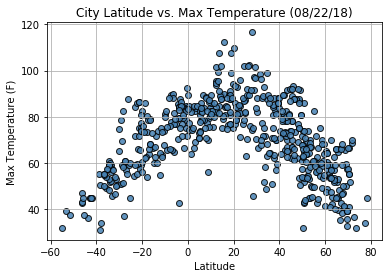

In [8]:
x= Citi_Data["Lat"]
y = Citi_Data["Max Temp"]
plt.scatter(x,y,marker ='o',c='steelblue', alpha =0.85,edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.grid()
plt.savefig("output_data/City_Latitude_vs._Max_Temperature.png")

#### Latitude vs. Humidity Plot

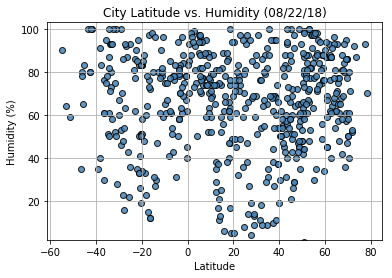

In [9]:
x= Citi_Data["Lat"]
y = Citi_Data["Humidity"]
plt.scatter(x,y,marker ='o',c='steelblue', alpha =0.85,edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(2,103)
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.grid()
plt.savefig("output_data/City_Latitude_vs._Humidity.png")

#### Latitude vs. Cloudiness Plot

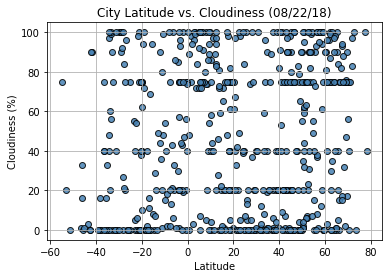

In [10]:
x= Citi_Data["Lat"]
y = Citi_Data["Cloudiness"]
plt.scatter(x,y,marker ='o',c='steelblue', alpha =0.85,edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.grid()
plt.savefig("output_data/City_Latitude_vs._Cloudiness.png")

#### Latitude vs. Wind Speed Plot

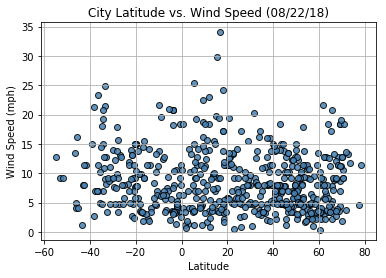

In [11]:
x= Citi_Data["Lat"]
y = Citi_Data["Wind Speed"]
plt.scatter(x,y,marker ='o',c='steelblue', alpha =0.85,edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.grid()
plt.savefig("output_data/City_Latitude_vs._Wind_Speed.png")